In [3]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '/home/rancher/projects/Bible/dataset/t_kjv.csv'

# Read the CSV file into a dataframe
df = pd.read_csv(csv_file_path)

# Now you can work with the dataframe
# For example, you can print the first few rows
print(df.head())


        id  b  c  v                                                  t
0  1001001  1  1  1  In the beginning God created the heaven and th...
1  1001002  1  1  2  And the earth was without form, and void; and ...
2  1001003  1  1  3  And God said, Let there be light: and there wa...
3  1001004  1  1  4  And God saw the light, that it was good: and G...
4  1001005  1  1  5  And God called the light Day, and the darkness...


## Load genres, Bible version dataset, and genre

In [4]:
genres = pd.read_csv('/home/rancher/projects/Bible/dataset/key_genre_english.csv')
kjv_bible = pd.read_csv('/home/rancher/projects/Bible/dataset/t_kjv.csv')
book = pd.read_csv('/home/rancher/projects/Bible/dataset/key_english.csv')

print(genres.head())

   g         n
0  1       Law
1  2   History
2  3    Wisdom
3  4  Prophets
4  5   Gospels


## Merge book, version, genre on genre

In [5]:
book = pd.merge(book, genres, on='g')
print(book.head())

   b          n_x   t  g  n_y
0  1      Genesis  OT  1  Law
1  2       Exodus  OT  1  Law
2  3    Leviticus  OT  1  Law
3  4      Numbers  OT  1  Law
4  5  Deuteronomy  OT  1  Law


In [10]:
df = pd.merge(kjv_bible, book, left_on = 'b', right_on = 'b')
df.head()

,id,b,c,v,t_x,n_x,t_y,g,n_y
0,1001001,1,1,1,In the beginning God created the heaven and th...,Genesis,OT,1,Law
1,1001002,1,1,2,"And the earth was without form, and void; and ...",Genesis,OT,1,Law
2,1001003,1,1,3,"And God said, Let there be light: and there wa...",Genesis,OT,1,Law
3,1001004,1,1,4,"And God saw the light, that it was good: and G...",Genesis,OT,1,Law
4,1001005,1,1,5,"And God called the light Day, and the darkness...",Genesis,OT,1,Law


## Rename column headers

In [6]:
df = df.rename(columns={'t_x': 'content', 'n_x' : 'book', 't_y' : 'testament', 'n_y' : 'genre'})
df.head()

,id,b,c,v,t
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


In [10]:
column_headers = df.columns.tolist()

print(column_headers)

['id', 'b', 'c', 'v', 't']


## Search for a specific term (return count)

In [37]:
# Insert string that you want to look for
search_term = 'love'
# Insert the specific book number from column 'b' to search within
#items_to_search = [40, 43]

# Use this block if you want to search several consecutive items at once
# for example, items 14 through 24
start_item = 40
end_item = 43
filtered_df = df[df['b'].between(start_item, end_item) & df['t'].str.contains(search_term, case=False)]

# Boolean indexing to filter rows based on the specified conditions
#filtered_df = df[df['b'].isin(items_to_search) & df['t'].str.contains(search_term, case=False)]

# Print the filtered dataframe
print(filtered_df)

# Count the amount of times search_term appears
count = filtered_df['t'].str.count(search_term).sum()

# Print number of times search term appeared in content
print(f"Search term '{search_term}' appeared {count} times.")

# Assuming you have a filtered dataframe named 'filtered_df'
output_file = '/home/rancher/projects/Bible/dataset/output/filtered.csv'  # Specify the filename and path for the output file

# Write the filtered dataframe to a CSV file
filtered_df.to_csv(output_file, index=False)  # Set index=False to exclude the index column


             id   b   c   v                                                  t
23209  40003017  40   3  17  And lo a voice from heaven, saying, This is my...
23277  40005043  40   5  43  Ye have heard that it hath been said, Thou sha...
23278  40005044  40   5  44  But I say unto you, Love your enemies, bless t...
23280  40005046  40   5  46  For if ye love them which love you, what rewar...
23287  40006005  40   6   5  And when thou prayest, thou shalt not be as th...
...         ...  ..  ..  ..                                                ...
26905  43021007  43  21   7  Therefore that disciple whom Jesus loved saith...
26913  43021015  43  21  15  So when they had dined, Jesus saith to Simon P...
26914  43021016  43  21  16  He saith to him again the second time, Simon, ...
26915  43021017  43  21  17  He saith unto him the third time, Simon, son o...
26918  43021020  43  21  20  Then Peter, turning about, seeth the disciple ...

[75 rows x 5 columns]
Search term 'love' appeared 9

## Visualize using matplot library

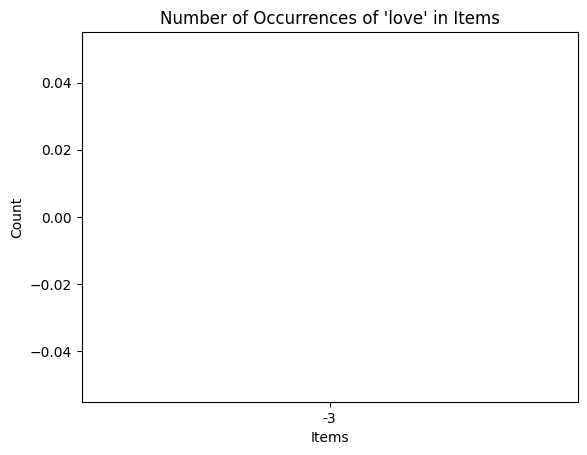

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a filtered dataframe named 'filtered_df'
# Assuming you have a search term named 'search_term'
# Assuming you have a list of items to search named 'items_to_search'

# Count the occurrences of the search term for each item in 'items_to_search'
counts = []
for item in items_to_search:
    count = filtered_df[filtered_df['b'] == item]['t'].str.count(search_term).sum()
    counts.append(count)

# Create a bar chart to visualize the comparison
plt.bar(range(len(items_to_search)), counts)
plt.xticks(range(len(items_to_search)), items_to_search)
plt.xlabel('Items')
plt.ylabel('Count')
plt.title(f"Number of Occurrences of '{search_term}' in Items")
plt.show()

In [15]:
df.groupby(by=['book', 'testament', 'genre']).agg({
    'c' : 'max',
    'v' : 'count'
}).reset_index().sort_values(['v'], ascending = False)

,book,testament,genre,c,v
58,Psalms,OT,Wisdom,150,2461
29,Genesis,OT,Law,50,1533
36,Jeremiah,OT,Prophets,52,1364
34,Isaiah,OT,Prophets,66,1292
53,Numbers,OT,Law,36,1288
...,...,...,...,...,...
55,Philemon,NT,Epistles,1,25
42,Jude,NT,Epistles,1,25
54,Obadiah,OT,Prophets,1,21
16,3 John,NT,Epistles,1,15
